In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import urllib.request
from PIL import Image
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from acquire import *
from prepare import *
from explore import *
import env

|               | pred dog   | pred cat   |
|:------------  |-----------:|-----------:|
| actual dog    |         46 |         7  |
| actual cat    |         13 |         34 |


In [3]:
# For this evaluation, I am choosing "dog" to be the positive/affirmitive.

# A false positive would be that the prediction was dog, but it was actually a cat.

# A false negative would be that the prediction was cat, but it was actually a dog.

#True positive is predicting its a dog, and it's a dog.
tp = 46

#True negative is predicting its a cat, and it's a cat.
tn = 34

#False positive is predicting its a dog, but it's a cat.
fp = 13

#false negative is predicting its a cat, but it's a dog.
fn = 7

print("Dog-classifier (where 'dog' is the positive prediction)")

print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)

precision = tp / (tp + fp)

recall = tp / (tp + fn)

print("Accuracy is", accuracy)
print("Recall is", round(recall,2))
print("Precision is", round(precision,2))


Dog-classifier (where 'dog' is the positive prediction)
True Positives 46
False Positives 13
False Negatives 7
True Negatives 34
-------------
Accuracy is 0.8
Recall is 0.87
Precision is 0.78


We reject the null hypothesis that survived and survived are independent.
There appears to be a relationship between survived and survived.
We reject the null hypothesis that parch and survived are independent.
There appears to be a relationship between survived and parch.
We reject the null hypothesis that alone and survived are independent.
There appears to be a relationship between survived and alone.
We reject the null hypothesis that sex_male and survived are independent.
There appears to be a relationship between survived and sex_male.
We fail to reject the null hypothesis that embark_town_Queenstown and survived are independent.
There appears to be no relationship between  survived and  embark_town_Queenstown .
We reject the null hypothesis that embark_town_Southampton and survived are independent.
There appears to be a relationship between survived and embark_town_Southampton.


DecisionTreeClassifier()

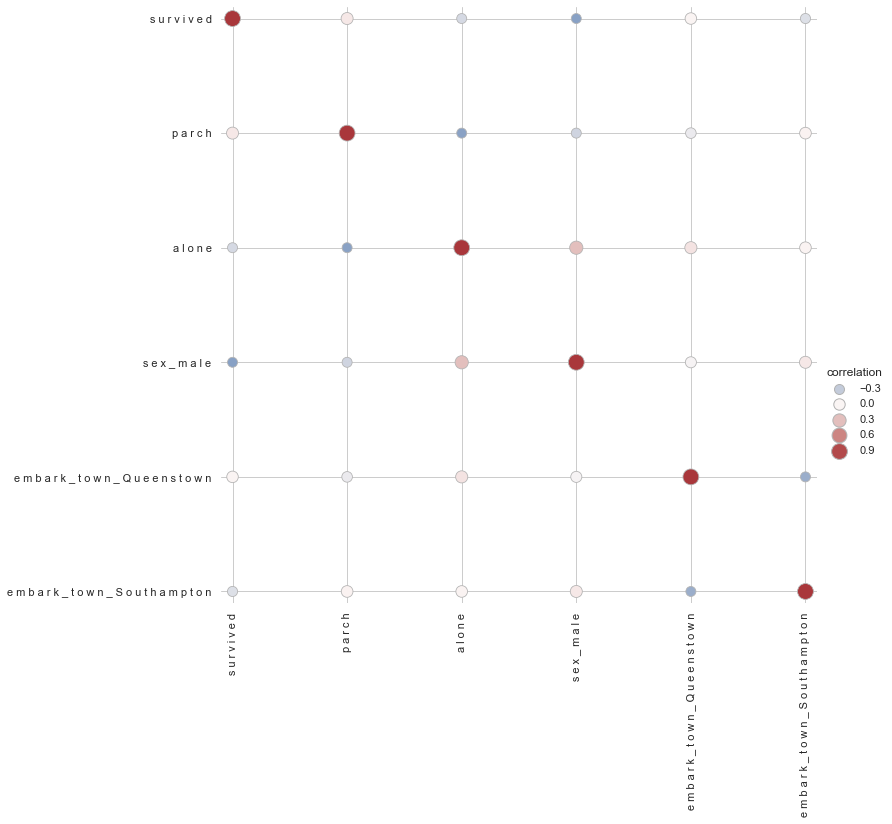

In [14]:
df = prep_tit(pd.DataFrame(new_tit_df()))

train, validate, test = prep_split(df, "survived")
train = train.drop(columns = ["sex", "embark_town"])

num_type_list, cat_type_list = dtypes_to_list(train)
cat_analysis(train, "survived", cat_type_list)

baseline = train.survived.value_counts().max()

X_train = train.drop(columns = "survived")
y_train = train.survived
(y_train == 0).mean()

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_train, y_train)
accuracy_score(y_preds.y_act, y_preds.model1)

cr = pd.DataFrame(classification_report(y_preds.y_act, y_preds.model1, output_dict = True))

conf_mat = confusion_matrix(y_preds.y_act, y_preds.model1)

